In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.fft import fft2, ifft2, fftshift, ifftshift #importando as funções para as transformações de fourier

# Filtragem no dominio da frequencia

### Conceitos preliminares


### Teorema da Amostragem

## Aula 7

In [66]:
#carregar a imagem
img = cv2.imread("./img_teste.tif", cv2.IMREAD_GRAYSCALE)
# img.dtype
# img.shape

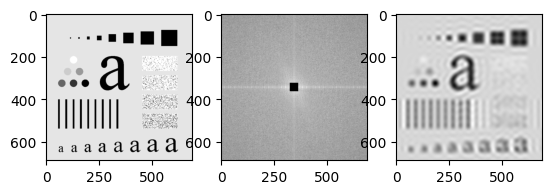

In [68]:
# plt.imshow(img, cmap="gray") # para mostrar a imagem
# plt.show

# ---- FFT ----
F = fft2(img)
# F.dtype #o tipo é complexo
# F.shape #O tamanho da transformada é igual o da imagem original 
F_shifted = fftshift(F)
linhas, colunas = F_shifted.shape
cl = linhas // 2
cc = colunas // 2 #para achar o meio da imagem
mascara = np.ones(F_shifted.shape)
mascara_freq_alta = np.zeros(F_shifted.shape)
mascara[cl-20:cl+20,cc-20:cc+20] = 0 #zerando o meio
mascara_freq_alta[cl-20:cl+20, cc-20:cc+20] = 1
F_shifted_masc = F_shifted * mascara
F_shifted_masc2 = F_shifted * mascara_freq_alta
img_hp = np.real(ifft2(ifftshift(F_shifted_masc))) #desfaz o shift e desfaz a transformação, voltando para o "original"
img_lp = np.real(ifft2(ifftshift(F_shifted_masc2)))


fig, axs = plt.subplots(1,3)
axs[0].imshow(img, cmap="gray")
#axs[0].set_tittle("Imagem Original")
axs[1].imshow(np.log10(np.abs(F_shifted_masc)+ 1), cmap="gray") # Sem shift --> axs[1].imshow(np.log10(np.abs(F)), cmap="gray")
#axs[1].set_tittle("Imagem Frequencia")
axs[2].imshow(img_lp, cmap="gray")
plt.show()



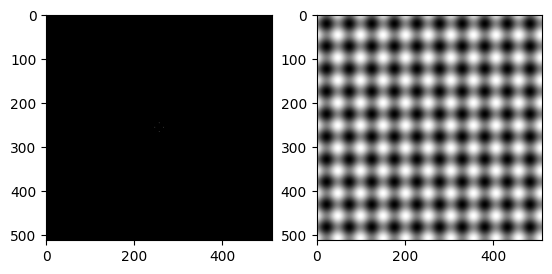

In [82]:


N = 512 # tamanho do spectrum de fourier
u0 = 10
v0 = 10
amplitude = 1.0
fase = np.deg2rad(30.0) #angulo de fase, np.deg2rad(30.0) //transforma de graus para rad
A = amplitude * np.exp(1j * fase) # senoide // amplitude* cos(fase) + jsen(fase)

# criando um espectrum vazio
S = np.zeros((N,N), dtype=np.complex128)
cl = 512 // 2
cc = 512 // 2
S[cl,cc + 10] = A
S[cl,cc - 10] = np.conj(A) # fazendo na coluna ou na linha, ou coluna e linha
S[cl + 10,cc] = A
S[cl - 10,cc] = np.conj(A) # fazendo na coluna ou na linha, ou coluna e linha
# FFT - INversa
img = np.real(ifft2(ifftshift(S)))

fig, axs = plt.subplots(1,2)
axs[0].imshow(np.log(np.abs(S) + 1), cmap="gray")
axs[1].imshow(img, cmap="gray") # Sem shift --> axs[1].imshow(np.log10(np.abs(F)), cmap="gray")

plt.show()